https://colab.research.google.com/drive/15R4l6aP1F-pcesSuS4G2PlOILoXyNB0n?usp=sharing#scrollTo=EncykWJFWTUg

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Activation, Flatten, Dropout,BatchNormalization
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizer_v1 import RMSprop

from sklearn import datasets
from sklearn.model_selection import train_test_split

from keras.applications.vgg16 import VGG16, decode_predictions
from keras.preprocessing.image import load_img, img_to_array


import keras
from keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Fashion Mnist CNN

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()     


x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# CNN 네트워크 구성

In [3]:
input_size = (28, 28, 1)

model = Sequential()

model.add(  Convolution2D(32, kernel_size=(3,3) ,padding='same', 
                          activation='relu', input_shape = input_size) )         # 32 필터 학습
model.add(  Convolution2D(32, kernel_size=(3,3) ) )         # 32 필터 학습.  총 64개 필터 학습
model.add(  MaxPooling2D(pool_size=(2, 2))  )

model.add(  Convolution2D(64, kernel_size=(3,3) ) )
model.add(  MaxPooling2D(pool_size=(2, 2))  )

model.add(  Convolution2D(128, kernel_size=(3,3) ) )
model.add(  MaxPooling2D(pool_size=(2, 2))  )

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0

In [4]:
input_size = (28,28,1)

model = Sequential()

model.add(  Convolution2D(32, kernel_size=(3,3), padding='same', 
                          activation='relu',  input_shape = input_size,)    )   
model.add(  Convolution2D(32, kernel_size=(3,3), padding='same',  )    )   
model.add(  MaxPooling2D(pool_size=(2, 2))  )

model.add(  Convolution2D(64, kernel_size=(3,3), padding='same' )    )   
model.add(  MaxPooling2D(pool_size=(2, 2))  )

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

# Fashion-mnist CNN 네트워크

In [5]:
input_shape = (28, 28, 1)

model = Sequential()

model.add(Convolution2D(32, kernel_size=(3, 3),
                     activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',  optimizer='adam',  metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [6]:
input_shape = (28, 28, 1)

model = Sequential()

model.add(Convolution2D(32, kernel_size=(3, 3),
                     activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu')) 
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',  optimizer='adam',  metrics=['accuracy'])

history = model.fit(x_train, y_train , batch_size=32,  epochs=5, verbose=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
 143/1875 [=>............................] - ETA: 28s - loss: 8.6190 - accuracy: 0.7069

KeyboardInterrupt: 

In [ ]:
input_shape = (28, 28, 1)

model = Sequential()

model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu')) 
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',  optimizer='adam',  metrics=['accuracy'])
history = model.fit(x_train, y_train , batch_size=32,  epochs=5, verbose=1)

In [ ]:
input_shape = (28, 28, 1)

model = Sequential()

model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu')) 
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',  optimizer='adam',  metrics=['accuracy'])
history = model.fit(x_train, y_train , batch_size=32,  epochs=2, verbose=1)

In [ ]:
input_shape = (28, 28, 1)

model = Sequential()

model.add(Convolution2D(128, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu')) 
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',  optimizer='adam',  metrics=['accuracy'])
history = model.fit(x_train, y_train , batch_size=32,  epochs=2, verbose=1)

In [ ]:
input_shape = (28, 28, 1)

model = Sequential()

model.add(Convolution2D(64, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu')) 
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',  optimizer='adam',  metrics=['accuracy'])
history = model.fit(x_train, y_train , batch_size=32,  epochs=2, verbose=1)

In [ ]:
input_shape = (28, 28, 1)

model = Sequential()

model.add(Convolution2D(32, kernel_size=(3, 3),  padding='same', activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, kernel_size=(3, 3),  padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, kernel_size=(3, 3),  padding='same', activation='relu'))
model.add(Convolution2D(32, kernel_size=(3, 3),  padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu')) 
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',  optimizer='adam',  metrics=['accuracy'])
history = model.fit(x_train, y_train , batch_size=32,  epochs=2, verbose=1)

# GPU 사용하기

- 코랩에서 사용해야함

In [15]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
print(device_name)

TypeError: executing_eagerly() takes 0 positional arguments but 1 was given

In [ ]:
with tf.device(device_name): 
    input_shape = (28, 28, 1)

    model = Sequential()

    model.add(Convolution2D(32, kernel_size=(3, 3),  padding='same', activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Convolution2D(64, kernel_size=(3, 3),  padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Convolution2D(32, kernel_size=(3, 3),  padding='same', activation='relu'))
    model.add(Convolution2D(32, kernel_size=(3, 3),  padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64, activation='relu')) 
    model.add(Dense(10, activation='softmax'))
    model.summary()
    model.compile(loss='sparse_categorical_crossentropy',  optimizer='adam',  metrics=['accuracy'])
    history = model.fit(x_train, y_train , batch_size=32,  epochs=2, verbose=1)

# DataGenerator를 이용한 한글 인식

In [2]:
X = 255 - np.load('data/X-h.npy')
y = np.load('data/y-h.npy')  #  한글 980자, 46060개의 이미지
num_classes = np.max(y) + 1
print(y.shape)
print(np.max(y), num_classes)

(46060,)
979 980


In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print("X_data:", X.shape)
print("y_labels:", y.shape)
print("X_train:", x_train.shape)
print("X_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_data: (46060, 32, 32, 3)
y_labels: (46060,)
X_train: (36848, 32, 32, 3)
X_test: (9212, 32, 32, 3)
y_train: (36848,)
y_test: (9212,)


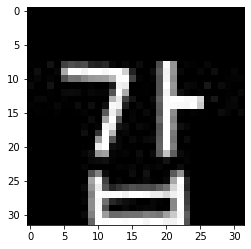

In [4]:
plt.imshow(X[1])

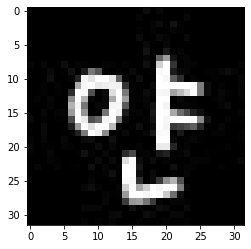

In [11]:
plt.imshow(X[2, :, :, 0], cmap = 'gray')

In [4]:
# 3차원에서
x_train = x_train[:, :, :, 0]
x_test = x_test[:, :, :, 0]
print(x_train.shape)

# 4차원으로 변환
x_train = x_train.reshape(-1, 32, 32, 1)
x_test = x_test.reshape(-1, 32, 32, 1)
print(x_train.shape)

(36848, 32, 32)
(36848, 32, 32, 1)


In [6]:
# Data Augmentation
batch_size = 128
train_generator = ImageDataGenerator(rescale = 1./255,
                                    rotation_range = 15,
                                    width_shift_range = 0.15,
                                    height_shift_range = 0.15,
                                    shear_range = 0.2,
                                    zoom_range = [0.8, 1.2])

test_generator = ImageDataGenerator(rescale = 1./255)

train_data_flow = train_generator.flow(x_train, y_train, batch_size = batch_size)
test_data_flow = test_generator.flow(x_test, y_test, batch_size = batch_size)

In [5]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), padding='same',
                 input_shape=(32,32,1)))
model.add(Activation('relu'))
model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.50))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',   optimizer=RMSprop(lr=0.001, rho=0.9),   metrics=['accuracy'])

ValueError: ('`tf.compat.v1.keras` Optimizer (', <keras.optimizer_v1.RMSprop object at 0x0000018A0D046C70>, ') is not supported when eager execution is enabled. Use a `tf.keras` Optimizer instead, or disable eager execution.')

In [ ]:
hist = model.fit_generator(train_data_flow, epochs=20, verbose=1)

In [ ]:
def hangul_cnn_model() :
  model = Sequential()
  model.add(Convolution2D(32, (3, 3), padding='same',
                  input_shape=(32,32,1)))
  model.add(Activation('relu'))
  model.add(Convolution2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Convolution2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Dropout(0.50))

  model.add(Convolution2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  model.compile(loss='sparse_categorical_crossentropy',   optimizer=RMSprop(learning_rate=0.001, rho=0.9),   metrics=['accuracy'])

  return model

In [ ]:
model = hangul_cnn_model()

In [ ]:
hist = model.fit(train_data_flow, epochs=5, verbose=1)

In [ ]:
model.save('hangul_cnn.h5')

In [ ]:
model2 = keras.models.load_model("hangul_cnn.h5")
model2.summary()

In [ ]:
test = x_test[0]  # 32x32x1
print(test.shape)
plt.imshow(test.reshape(32,32), cmap='gray')

#p = model.predict(test.reshape(1,32,32,1))   # 4차원  1x32x32x1
p = model.predict_classes(test.reshape(1,32,32,1))   # 4차원  1x32x32x1
print(p)

labels_file = io.open("label.txt", 'r', encoding='utf-8').read().splitlines()
#labels_file
print(labels_file[ p[0] ])

# Open CV 연동 한글 인식

In [ ]:
import keras
import io
import cv2

model = keras.models.load_model("hangul_cnn.h5")
labels_file = io.open("label.txt", 'r', encoding='utf-8').read().splitlines()

ix,iy = -1,-1
drawing = False
img = np.zeros((256,256), np.uint8)

def draw(event,x,y,flags,param):
    global ix,iy,drawing, img

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y        
        
    elif event==cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.line(img,(ix,iy),(x,y),(255,255,255),15)
            ix = x
            iy = y             
    elif event==cv2.EVENT_LBUTTONUP:
        drawing=False    
        
        
cv2.imshow('image',img)
cv2.setMouseCallback('image',draw)          


while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1)
    
    if k == 32 :
        img2 = cv2.resize(img, (32, 32), interpolation = cv2.INTER_LINEAR)
        plt.imshow(img2, cmap='gray')
        plt.show()        
        
        img2 = 1 - img2.reshape(1,32,32,1) / 255
        id = np.argmax(model.predict(img2))
        print(labels_file[id])
        img = np.zeros((256,256), np.uint8)           
        
        
    elif k == 27:
        break

cv2.destroyAllWindows()  

# ImageNet을 활용한 영상 인식

In [6]:
from keras.applications.vgg16 import VGG16, decode_predictions
model = VGG16(weights='imagenet')
model.summary()

553476096/553467096 [==============================] - 73s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

<class 'PIL.Image.Image'>
(224, 224, 3)
(1, 224, 224, 3)


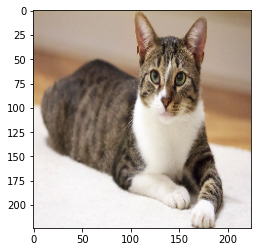

In [13]:
image = load_img('data/cat.jpg', target_size=(224, 224))
plt.imshow(image)
print(type(image))
x = img_to_array(image)
print(x.shape)

x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 1000)
[285]


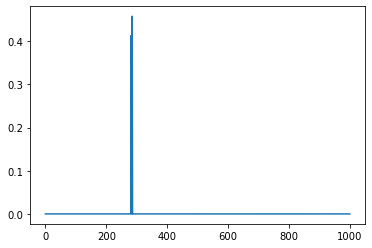

In [15]:
pred = model.predict(x)
print(pred.shape)
plt.plot(pred[0,:])
print( np.argmax(pred, axis=1)  )

In [16]:
print('Predicted:', decode_predictions(pred, top=3)[0])

49152/35363 [=========================================] - 0s 0us/step
Predicted: [('n02124075', 'Egyptian_cat', 0.4579761), ('n02123045', 'tabby', 0.41301444), ('n02123159', 'tiger_cat', 0.12738293)]


In [18]:
with open("data/labels_h.txt", 'r', -1, 'utf-8') as f:    
     labels_h = f.read().splitlines()            
print(labels_h)      

['잉어의 일종', '금붕어', '백상아리', '범 상어', '귀상어', '전기 광선', '가오리', '수탉', '대단히', '타조', '되새', '금화', '하우스 핀치', '돌진', '인디고 멧', '남자 이름', '벌벌', '어치', '까치', '박새 속의 총칭', '물 까마귀', '연', '흰머리 독수리', '무자비한 사람', '큰 회색 올빼미', '유럽 \u200b\u200b화재 도롱뇽', '일반적인 영원', '이다', '발견 도롱뇽', '아 홀로 틀', '황소 개구리', '청개구리', '꼬리 개구리', '얼간이', '장수 거북', '진흙 거북', '후미 거북', '상자 거북', '줄무늬 도마뱀', '일반 이구아나', '미국의 카멜레온', '채찍 꼬리', '종교', '주름 장식 도마뱀', '악어 도마뱀', '길라 몬스터', '녹색 도마뱀', '아프리카 카멜레온', '코모도 왕 도마뱀', '아프리카 악어', '미국 악어', '트리케라톱스', '천둥 뱀', 'ringneck 뱀', 'hognose 뱀', '녹색 뱀', '왕 뱀', '가터 뱀', '물뱀', '포도 나무 뱀', '밤 뱀', '보아', '바위 파이썬', '인도 코브라', '그린 맘바', '바다 뱀', '뿔 독사', '다이아몬드', '사이드 와인 더', '삼엽충', 'harvestman입니다', '투석기', '블랙과 골드 정원 거미', '어린이 거미', '정원 거미', '블랙 위도우', '타란툴라 거미', '늑대 거미', '진드기', '지네', '블랙 그 라우스', '멧닭', '목도리 뇌조', '뇌조의 일종', '공작', '메추라기', '자고', '아프리카 회색', '앵무새', '유황 볏이 앵무새', '진훙 잉꼬의 일종', '코 칼류', '꿀벌 먹는 사람', '코뿔새', '벌새', 'Jasmer', '큰 부리 새', '드레이크', '붉은 가슴 비오리', '거위', '검은 백조', '큰 엄니가있는 동물', '가시 두더지', '오리너구리', '왈라비', '주머니 곰 코알라', '웜뱃', '해파리',

전화로 전화를 걸


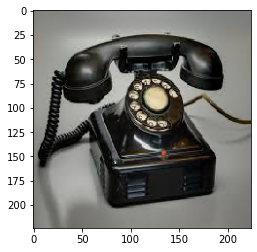

In [19]:
image = load_img('data/phone.jpg', target_size=(224, 224))
plt.imshow(image)
x = img_to_array(image)
x = np.expand_dims(x, axis=0)

pred = model.predict(x)
id = np.argmax(pred, axis=1)[0]
print(labels_h[id])

# zip 파일 풀기

In [21]:
batch_size = 16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        'data/train',  
        target_size=(224, 224), 
        batch_size=batch_size,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
